In [100]:
import zipfile
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()

In [101]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
%matplotlib inline

Зчитуємо дані

In [102]:
data_2d = pd.concat(pd.read_csv(f) for f in glob.glob("/content/data/data_2d.csv"))
data_mnist = pd.concat(pd.read_csv(f) for f in glob.glob("/content/data/mnist.csv"))

In [58]:
data_2d.shape

(199, 3)

In [59]:
data_mnist.shape

(499, 785)

K-means, визначення оптимальної кількості кластерів ліктевим методом та візуалізація кластеризації для data_2d

In [103]:
data_2d_set = data_2d.values
k_means_2d = range(1, 11)
list_2d = []

for k in k_means_2d:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d_set)
    list_2d.append(sum(np.min(pairwise_distances(data_2d_set , kmeans.cluster_centers_, metric='euclidean'), axis=1)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

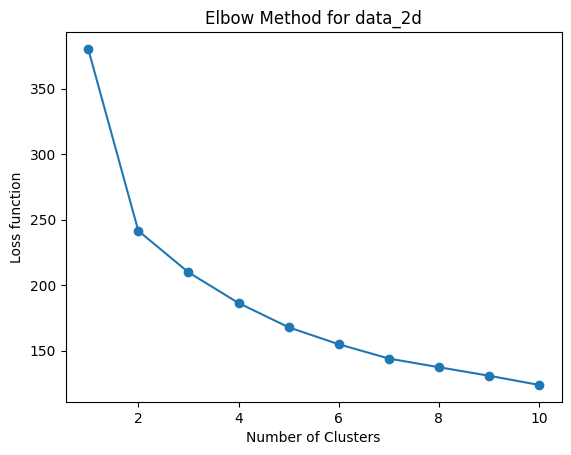

In [104]:
plt.plot(k_means_2d, list_2d, marker='o')
plt.title('Elbow Method for data_2d')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss function')
plt.show()

In [108]:
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
kmeans_optimal.fit(data_2d_set)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


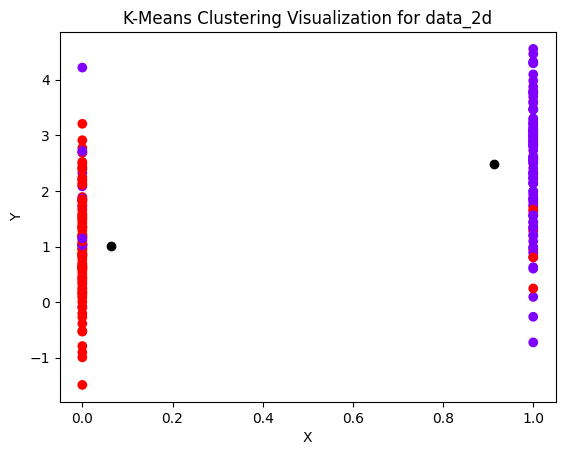

In [109]:
kmeans_2d_model = KMeans(n_clusters=2, random_state=42)
kmeans_2d_model.fit(data_2d_set)

plt.scatter(data_2d_set[:,0], data_2d_set[:,1], c=kmeans_2d_model.labels_, cmap='rainbow')

plt.scatter(kmeans_2d_model.cluster_centers_[:, 0], kmeans_2d_model.cluster_centers_[:,1], color='black')

plt.title('K-Means Clustering Visualization for data_2d')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

K-means, визначення оптимальної кількості кластерів ліктевим методом та візуалізація кластеризації для mnist

In [116]:
data_mnist_set = data_mnist.values
mnist_to_2d = PCA(n_components=2)
mnist_pca = mnist_to_2d.fit_transform(data_mnist_set)

In [117]:
k_means_mnist = range(1, 11)
list_mnist = []

for k in k_means_mnist:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mnist_pca)
    list_mnist.append(sum(np.min(pairwise_distances(mnist_pca, kmeans.cluster_centers_, metric='euclidean'), axis=1)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

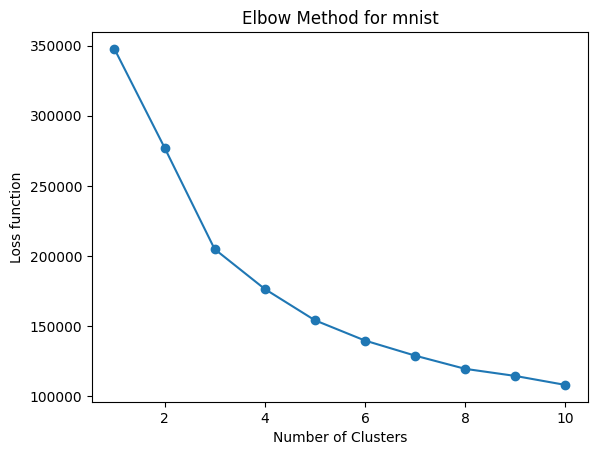

In [118]:
plt.plot(k_means_mnist, list_mnist, marker='o')
plt.title('Elbow Method for mnist')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss function')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


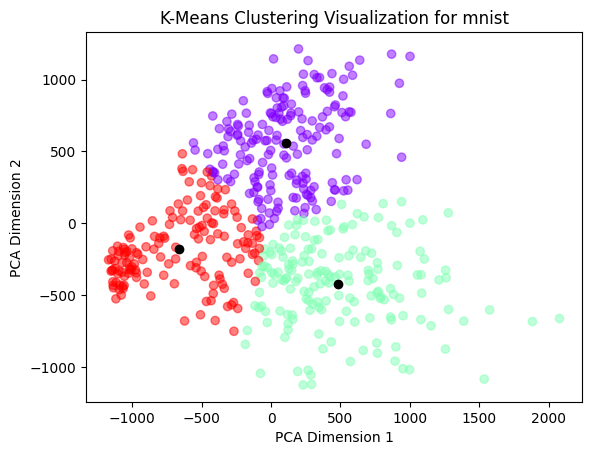

In [119]:
kmeans_mnist_model = KMeans(n_clusters=3, random_state=42)
kmeans_mnist_model.fit(mnist_pca)

plt.scatter(mnist_pca[:,0], mnist_pca[:,1], c=kmeans_mnist_model.labels_, cmap='rainbow', alpha=0.5)

plt.scatter(kmeans_mnist_model.cluster_centers_[:, 0],kmeans_mnist_model.cluster_centers_[:, 1], color='black')

plt.title('K-Means Clustering Visualization for mnist')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

plt.show()